In [45]:
import pandas as pd
import numpy as np

In [46]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/my_iris.csv")
veriler

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
#KORELASYON İLİŞKİLERİ
corr_matrix = veriler.corr()
def en_yuksek_iliskiler(corr_matrix):
    # Korelasyon matrisini sütunlara göre sıralama
    sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

    # Sıralanmış korelasyon değerlerinin en yüksek olduğu sütun ikililerini yazdırma
    for i, (s1, s2) in enumerate(sorted_corr.index):
        if s1 != s2:  # Aynı sütun ikilisini tekrarlamamak için
            print(f"{s1}-{s2}: {sorted_corr[i]}")

# Örnek kullanım
en_yuksek_iliskiler(corr_matrix)


petal_length-petal_width: 0.9627570970509662
petal_width-petal_length: 0.9627570970509662
sepal_length-petal_length: 0.8717541573048716
petal_length-sepal_length: 0.8717541573048716
sepal_length-petal_width: 0.8179536333691642
petal_width-sepal_length: 0.8179536333691642
sepal_length-sepal_width: -0.10936924995064931
sepal_width-sepal_length: -0.10936924995064931
sepal_width-petal_width: -0.35654408961380507
petal_width-sepal_width: -0.35654408961380507
sepal_width-petal_length: -0.4205160964011539
petal_length-sepal_width: -0.4205160964011539


<ipython-input-47-b4fccfc7c866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = veriler.corr()


In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [49]:
veriSetim=pd.read_csv("/content/my_iris.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, ["species"], ["sepal_length","sepal_width","petal_length","petal_width"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(columns="sepal_length",axis=1)
MyY = veriOnİslemeliSetDuzelt["sepal_length"]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
MyX

,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,0.625000,0.067797,0.041667,0.0,0.0
1,0.416667,0.067797,0.041667,0.0,0.0
2,0.500000,0.050847,0.041667,0.0,0.0
3,0.458333,0.084746,0.041667,0.0,0.0
4,0.666667,0.067797,0.041667,0.0,0.0
...,...,...,...,...,...
145,0.416667,0.711864,0.916667,0.0,1.0
146,0.208333,0.677966,0.750000,0.0,1.0
147,0.416667,0.711864,0.791667,0.0,1.0
148,0.583333,0.745763,0.916667,0.0,1.0


In [51]:
MyY

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal_length, Length: 150, dtype: float64

In [52]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [53]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

Gradient **Boosting**

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Gradient Boosting Regressor'ı oluştur
gb_regressor = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Gradient Boosting Regressor'ı eğit
gb_regressor.fit(MyX_train, MyY_train)

# Test verilerini kullanarak tahmin yap
y_pred_GradientBoost = gb_regressor.predict(MyX_test)

# Hata metriklerini değerlendir
mae_GradientBoost = mean_absolute_error(MyY_test, y_pred_GradientBoost)
mse_GradientBoost = mean_squared_error(MyY_test, y_pred_GradientBoost)
rmse_GradientBoost = np.sqrt(mse_GradientBoost)

print("MAE:", mae_GradientBoost)
print("MSE:", mse_GradientBoost)
print("RMSE:", rmse_GradientBoost)

MAE: 0.069984567182063
MSE: 0.007852365777718045
RMSE: 0.08861357558364319


XGBoost (Extreme Gradient Boosting)

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# XGBoost veri yapısına dönüştür
dtrain = xgb.DMatrix(MyX_train, label=MyY_train)
dtest = xgb.DMatrix(MyX_test, label=MyY_test)

# XGBoost parametrelerini belirle
params = {
    'max_depth': 2,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# XGBoost modelini eğit
num_rounds = 50
xgboost_model = xgb.train(params, dtrain, num_rounds)

# Test verileri üzerinde tahmin yap
y_pred_XGBoost = xgboost_model.predict(dtest)

# Metrikleri hesapla
mae_XGBoost = mean_absolute_error(MyY_test, y_pred_XGBoost)
mse_XGBoost = mean_squared_error(MyY_test, y_pred_XGBoost)
rmse_XGBoost = np.sqrt(mse_XGBoost)

print("MAE:", mae_XGBoost)
print("MSE:", mse_XGBoost)
print("RMSE:", rmse_XGBoost)

MAE: 0.06516334226837864
MSE: 0.00706831609910398
RMSE: 0.08407327815128883


LightGBM (Light Gradient Boosting Machine)

In [56]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Verileri LightGBM veri yapısına dönüştür
train_data = lgb.Dataset(MyX_train, label=MyY_train)
test_data = lgb.Dataset(MyX_test, label=MyY_test)

# LightGBM parametrelerini belirle
params = {
    'objective': 'regression',
    'metric': 'mae',
    'num_leaves': 60,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

# LightGBM modelini eğit
num_rounds = 100
lightgbm_model = lgb.train(params, train_data, num_boost_round=num_rounds)

# Test verileri üzerinde tahmin yap
y_pred_LightGBM = lightgbm_model.predict(MyX_test)

# Metrikleri hesapla
mae_LightGBM = mean_absolute_error(MyY_test, y_pred_LightGBM)
mse_LightGBM = mean_squared_error(MyY_test, y_pred_LightGBM)
rmse_LightGBM = np.sqrt(mse_LightGBM)

print("MAE:", mae_LightGBM)
print("MSE:", mse_LightGBM)
print("RMSE:", rmse_LightGBM)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] Start training from score 0.419213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

**AdaBoost**

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

# AdaBoostRegressor'ı oluştur
adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)

# AdaBoost'u eğit
adaboost.fit(MyX_train, MyY_train)

# Test verileri üzerinde tahmin yap
y_pred_AdaBoost = adaboost.predict(MyX_test)

# Metrikleri hesapla
mae_AdaBoost = mean_absolute_error(MyY_test, y_pred_AdaBoost)
mse_AdaBoost = mean_squared_error(MyY_test, y_pred_AdaBoost)
rmse_AdaBoost = np.sqrt(mse_AdaBoost)

print("MAE:", mae_AdaBoost)
print("MSE:", mse_AdaBoost)
print("RMSE:", rmse_AdaBoost)

# Modeli kaydet
dump(adaboost, 'adaboost_model.joblib')

# Modeli yükle
loaded_model = load('adaboost_model.joblib')

MAE: 0.06304890124710757
MSE: 0.006270659771428331
RMSE: 0.07918749757018674


**GRAFİK**

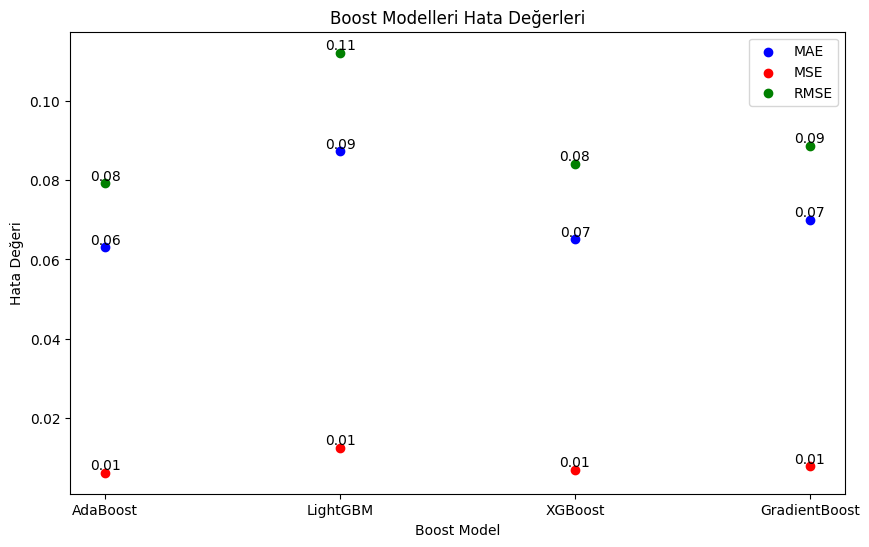

In [58]:
import matplotlib.pyplot as plt

# Boost modellerinin isimleri
boost_models = ['AdaBoost', 'LightGBM', 'XGBoost', 'GradientBoost']

# MAE değerleri
mae_values = [mae_AdaBoost, mae_LightGBM, mae_XGBoost, mae_GradientBoost]

# MSE değerleri
mse_values = [mse_AdaBoost, mse_LightGBM, mse_XGBoost, mse_GradientBoost]

# RMSE değerleri
rmse_values = [rmse_AdaBoost, rmse_LightGBM, rmse_XGBoost, rmse_GradientBoost]

# Grafik çizimi
plt.figure(figsize=(10, 6))

# MAE değerleri
plt.scatter(boost_models, mae_values, color='blue', label='MAE')

# MSE değerleri
plt.scatter(boost_models, mse_values, color='red', label='MSE')

# RMSE değerleri
plt.scatter(boost_models, rmse_values, color='green', label='RMSE')

# Değerleri noktanın üzerine yazdırma
for i in range(len(boost_models)):
    plt.text(boost_models[i], mae_values[i], f"{mae_values[i]:.2f}", ha='center', va='bottom')
    plt.text(boost_models[i], mse_values[i], f"{mse_values[i]:.2f}", ha='center', va='bottom')
    plt.text(boost_models[i], rmse_values[i], f"{rmse_values[i]:.2f}", ha='center', va='bottom')

# Eksen ve başlık etiketleri
plt.xlabel('Boost Model')
plt.ylabel('Hata Değeri')
plt.title('Boost Modelleri Hata Değerleri')
plt.legend()

# Grafik gösterme
plt.show()